# Lecture 01 | Probabilities
----
From Lecture 1 of [Probabilistic Machine Learning, 2025](https://youtube.com/playlist?list=PL05umP7R6ij0hPfU7Yuz8J9WXjlb3MFjm&si=OUREsI-Q45_E2jBt) by [Phillip Hennig, Tubingen University](https://uni-tuebingen.de/en/fakultaeten/mathematisch-naturwissenschaftliche-fakultaet/fachbereiche/informatik/lehrstuehle/methoden-des-maschinellen-lernens/personen/philipp-hennig/)

In [3]:
import numpy as np
from sympy import Matrix

# helper function to display matrix neatly as latex format
def display_matrix(arr: np.ndarray | list) -> Matrix:
    arr = np.asarray(arr)
    return Matrix(np.round(arr, 5))


# 1. It's all about the joint, $p(x, y)$

In probabilistic modeling, the joint generative model $p(x, y)$ tells us everything we need to know about $X$ and $Y$, and their statistical relationships and properties. We know that 
for any random variables $X$ and $Y$, we have 
\begin{align*}
p(x, y) &= p(X = x, Y = y)\\ &= p(x|y)p(y)\\ &= p(y|x)p(x)
\end{align*} 
and 
\begin{equation*}
p(x, y) = p(x)p(y) \iff X \perp Y
\end{equation*}

> **Bayes' Theorem:**  For any $X$ and $Y$, we have 
\begin{equation*}
p(x | y) = \frac{p(y|x)p(x)}{\int p(y|x)p(x) dx}
\end{equation*}

## 1.1 An example

Let $X$ be the outcome of roling an unbiased six-sided die, and $Y$ be the outcome of tossing an unbiased 2 sided coin.
- $X\in\{1, 2, 3, 4, 5, 6 \}$ 
- $Y\in\{H, T\}$
Assuming $X\perp Y$, the joint generative model is given by:
$$p(x,y) = p(x)p(y)$$

In [5]:
# joint generative model (or probability distribution) of X and Y, for any entry, the probability is 1/12 = 0.08333

joint_XY = np.array([1./12 for _ in range(2*6)]).reshape(6, 2)

display_matrix(joint_XY)

Matrix([
[0.08333, 0.08333],
[0.08333, 0.08333],
[0.08333, 0.08333],
[0.08333, 0.08333],
[0.08333, 0.08333],
[0.08333, 0.08333]])

The marginal of $X$ is obtained by summing out all the $Y$'s:

$$p(x) = \sum _y p(x, y)$$

In [6]:
print("The marginal of X, p(x) is:")
display_matrix(joint_XY.sum(axis=1))

The marginal of X, p(x) is:


Matrix([
[0.16667],
[0.16667],
[0.16667],
[0.16667],
[0.16667],
[0.16667]])

In [7]:
print("Similarly, the marginal of y, p(y) is:")
display_matrix(joint_XY.sum(axis=0))

Similarly, the marginal of y, p(y) is:


Matrix([
[0.5],
[0.5]])

In [8]:
my_matrix = np.array([[2,2,2], [3,3,3]])
my_vector = np.array([2,2,2])

# i expect to see: [[1, 1, 1], [1.5, 1.5, 1.5]]

my_matrix / my_vector

array([[1. , 1. , 1. ],
       [1.5, 1.5, 1.5]])

We can get the likelihood $p(y|x)$:
$$p(y|x) =\frac{p(x, y)}{p(x)} = \frac{p(x)p(y)}{p(x)} = p(y)$$
This means that knowing $X$ has no help in determining $Y$ (they are independent, remember), so here we expect to see just the marginal

In [10]:
joint_XY / joint_XY.sum(axis=1).reshape(6, 1)

array([[0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5]])

The above is the likehood. What are the chances of observing tails ($Y=T$) when the die is 3 ($X=3$)? That is, $p(y=H|X=3)$? So the array above summarizes the following:
- for column 1, it gives $p(Y=H|X=x)\qquad x=1,2,\dots,6$ 
- for column 2, it gives $p(Y=T|X=x)\qquad x=1,2,\dots,6$ 

> For each $X=x$, $p(Y=H|X=x)$ is a distribution in $Y$, so then, $p(y|x)$ is a function of $X$, but a distribution of $Y$ for each $X=x$

For all $x: p(Y=H|x) = 0.5, \quad p(Y=T|x) = 0.5$.

# 2. Removing the independence assumption


In a certain casino hall, a certain game was invented involving roling two dice. Dye 1 is three sided, and dice 2 is 7 sided. Die 1 tends to be 1 two thirds of the time when die 2 is 4 or more. Generally, die 2 is unbiased. 

In [11]:
joint_XY = np.array([
    [1./21, 1./21, 1./21],
    [1./21, 1./21, 1./21],
    [1./21, 1./21, 1./21],
    [2./21, 1./42, 1./42],
    [2./21, 1./42, 1./42],
    [2./21, 1./42, 1./42],
    [2./21, 1./42, 1./42],
])

display_matrix(joint_XY)

Matrix([
[0.04762, 0.04762, 0.04762],
[0.04762, 0.04762, 0.04762],
[0.04762, 0.04762, 0.04762],
[0.09524, 0.02381, 0.02381],
[0.09524, 0.02381, 0.02381],
[0.09524, 0.02381, 0.02381],
[0.09524, 0.02381, 0.02381]])

In [12]:
# let us confirm whether this is a probability distribution
joint_XY.sum()

np.float64(1.0)

In [13]:
# get the marginal of X
joint_XY.sum(axis=0)

array([0.52380952, 0.23809524, 0.23809524])

In [14]:
# what is the likelihood, p(x|y)?
display_matrix(joint_XY / joint_XY.sum(axis=1).reshape(7,1))

Matrix([
[0.33333, 0.33333, 0.33333],
[0.33333, 0.33333, 0.33333],
[0.33333, 0.33333, 0.33333],
[0.66667, 0.16667, 0.16667],
[0.66667, 0.16667, 0.16667],
[0.66667, 0.16667, 0.16667],
[0.66667, 0.16667, 0.16667]])

The above table suggests that when $Y\ge 4$, $X$ tends to be $1$

In [15]:
# what is the likelihood, p(y|x)?
display_matrix(joint_XY / joint_XY.sum(axis=0))

Matrix([
[0.09091, 0.2, 0.2],
[0.09091, 0.2, 0.2],
[0.09091, 0.2, 0.2],
[0.18182, 0.1, 0.1],
[0.18182, 0.1, 0.1],
[0.18182, 0.1, 0.1],
[0.18182, 0.1, 0.1]])

Dependence: $X=1$ makes $Y≥4$ more likely, while $X=2$ or $X=3$ makes $Y\le 3$ more likely.

# 3. A more realistic (but simulated) credit default data

In [18]:
import pandas as pd
from matplotlib import pyplot as plt
from tueplots import bundles
plt.rcParams.update(bundles.beamer_moml())
plt.rcParams.update({"figure.dpi": 180})

data = pd.read_csv('data/income_default_dataset.csv')
data.head()

,Income,Defaulted
0,42451.28,1
1,30903.45,1
2,45779.86,0
3,70917.34,0
4,29456.76,1


(0.0, 300000.0)

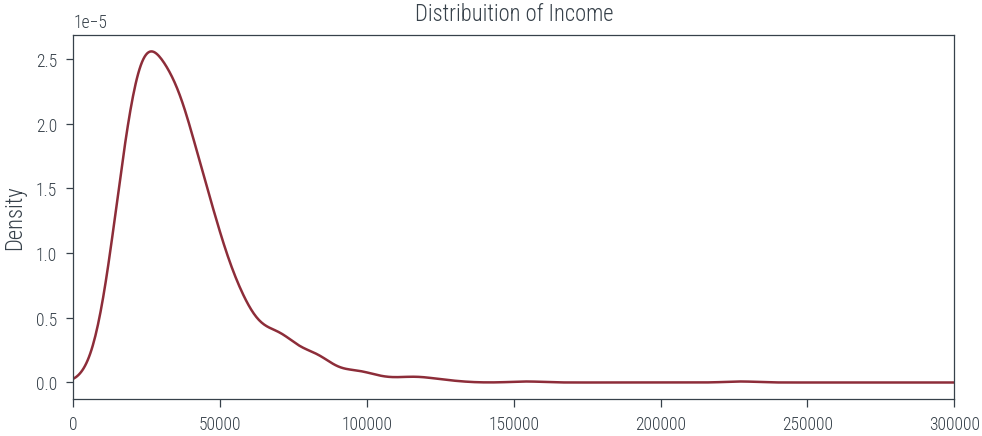

In [20]:
data['Income'].plot(kind='kde', 
                    title="Distribuition of Income",
                    xlabel="Income")

plt.xlim(0, 300_000)

In [21]:
data['Income'].describe()

count      1000.000000
mean      37783.426260
std       20438.538382
min        6549.350000
25%       23955.677500
50%       33537.035000
75%       45785.707500
max      227321.600000
Name: Income, dtype: float64

<Axes: title={'center': 'Histogram of income'}, xlabel='Income', ylabel='Frequency'>

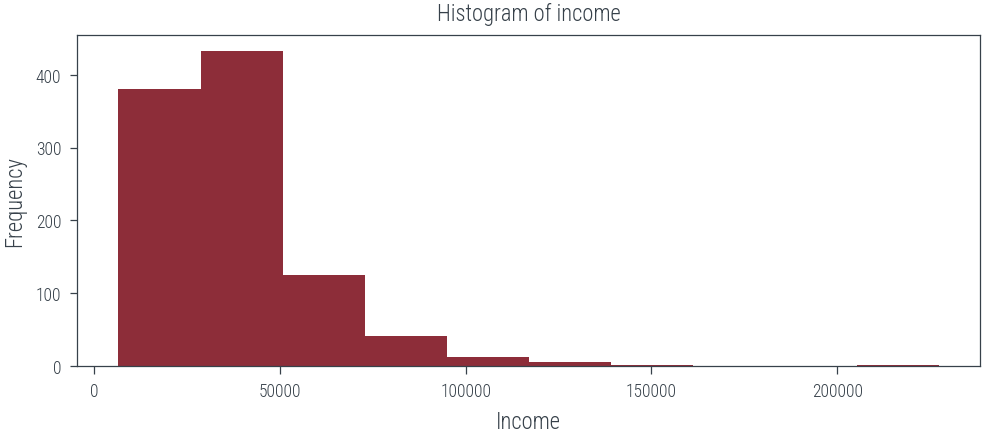

In [23]:
data['Income'].plot(kind='hist', title="Histogram of income", xlabel="Income")

In [26]:
# categorize income into levels
bins = [0, 20_000, 50_000, data["Income"].max()]
labels = ["Low", "Moderate", "High"]
data['IncomeLevel'] = pd.cut(data['Income'], bins=bins, right=True, labels=labels)
data.head()

,Income,Defaulted,IncomeLevel
0,42451.28,1,Moderate
1,30903.45,1,Moderate
2,45779.86,0,Moderate
3,70917.34,0,High
4,29456.76,1,Moderate


In [29]:
# create a frequency table for income levels
X, Y = data['IncomeLevel'].values, data['Defaulted'].values
N = data.shape[0]

data_table =\
     data.drop('Income', axis=1).groupby(
         ['IncomeLevel', 'Defaulted']).size().unstack(fill_value=0)

data_table

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_3700\3816245950.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data.drop('Income', axis=1).groupby(


Defaulted,0,1
IncomeLevel,,
Low,13,129
Moderate,187,477
High,140,54


In [30]:
joint_XY = (data_table / N).values
joint_XY

array([[0.013, 0.129],
       [0.187, 0.477],
       [0.14 , 0.054]])

In [31]:
# p(Defauted)?
joint_XY.sum(axis=0)

array([0.34, 0.66])

In [32]:
# p(IncomeLevel | Defauted)?
display_matrix(joint_XY / joint_XY.sum(axis=0))

Matrix([
[0.03824, 0.19545],
[   0.55, 0.72273],
[0.41176, 0.08182]])

In [33]:
display_matrix(joint_XY / joint_XY.sum(axis=1).reshape(3, 1))

Matrix([
[0.09155, 0.90845],
[0.28163, 0.71837],
[0.72165, 0.27835]])

From the likelihood above, we see that as income level rises, the probability of them defaulting decreases.

## 4. The generative model $p(x, y)$ can be used to generate synthetic samples $(X, Y)$.

In [34]:
display_matrix(joint_XY)

Matrix([
[0.013, 0.129],
[0.187, 0.477],
[ 0.14, 0.054]])

In [35]:
income_levels = ['Low', 'Moderate', 'High']
defaults = [0, 1]

probs = joint_XY.flatten()

probs

array([0.013, 0.129, 0.187, 0.477, 0.14 , 0.054])

In [36]:
outcomes = \
    [(income_level, default) for income_level in income_levels for default in defaults]

outcomes

[('Low', 0),
 ('Low', 1),
 ('Moderate', 0),
 ('Moderate', 1),
 ('High', 0),
 ('High', 1)]

In [37]:
data_table.values.flatten()

array([ 13, 129, 187, 477, 140,  54])

In [41]:
samples = np.random.choice(len(outcomes), size=2*N, p=probs) # generate samples from the joint distribution
synthetic_data = pd.DataFrame([outcomes[i] for i in samples], columns=['income_levels', 'defaulted'])
synthetic_data.head()

,income_levels,defaulted
0,Moderate,1
1,Moderate,1
2,Moderate,1
3,Moderate,0
4,Moderate,0


In [42]:
synthetic_joint = (
    synthetic_data.groupby(['income_levels', 'defaulted'])
    .size()
    .unstack(fill_value=0) / len(synthetic_data)
).reindex(['Low', 'Moderate', 'High']).values
synthetic_joint

array([[0.01  , 0.1235],
       [0.197 , 0.462 ],
       [0.152 , 0.0555]])

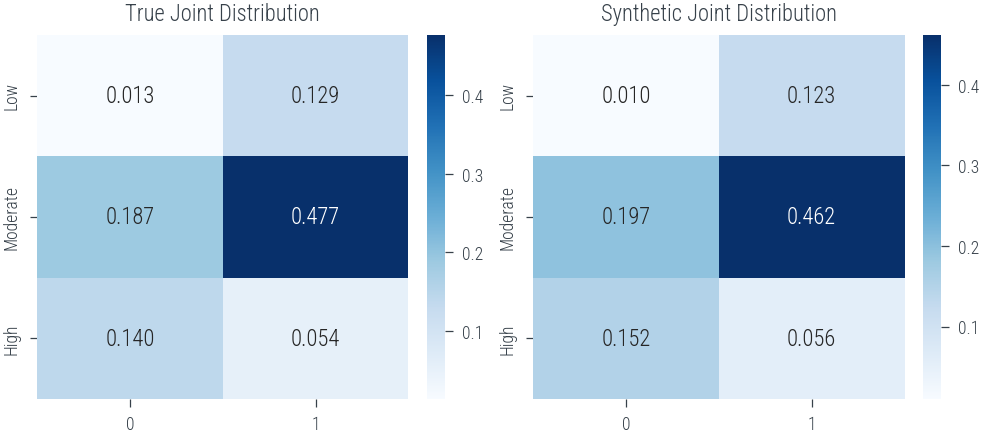

In [45]:
import seaborn as sns

fig, axes = plt.subplots(1, 2, )

sns.heatmap(joint_XY, annot=True, fmt=".3f", cmap="Blues",
            xticklabels=defaults, yticklabels=income_levels, ax=axes[0])
axes[0].set_title("True Joint Distribution")

sns.heatmap(synthetic_joint, annot=True, fmt=".3f", cmap="Blues",
            xticklabels=defaults, yticklabels=income_levels, ax=axes[1])
axes[1].set_title("Synthetic Joint Distribution")

plt.show()

There's little to no difference between the true joint distribution and the synthetic joint distribution